**SEABORN**

**Exercices**

**Exercice 1 -  Visualisation des notes des étudiants :**
* a) Chargez le fichier "student_grades.csv" dans un DataFrame nommé "grades_df".
* b) Utilisez Seaborn pour créer un histogramme représentant la distribution des notes des étudiants.


In [ ]:
import pandas as pd

path_csv = "student_grades.csv"
grades_df = pd.read_csv(path_csv, header=None, names=['ID', 'salle', 'note'])

# Création d'un dictionnaire pour faire correspondre les notes alphabetiques avec les notes numeriques
grade_to_num = {
    'E-': 0, 'E': 1, 'E+': 2,
    'D-': 3, 'D': 4, 'D+': 5,
    'C-': 6, 'C': 7, 'C+': 8,
    'B-': 9, 'B': 10, 'B+': 11,
    'A-': 12, 'A': 13, 'A+': 14,
}

# On place donc les valeurs decimales associées aux notes alphabetiques grace au map dans une nouvelle colonne note_dec
grades_df['note_dec'] = grades_df['note'].map(grade_to_num)

# On transforme en note sur 20
# Avec fonction .apply
grades_df['note_dec'] = grades_df['note_dec'].apply(lambda x: (x / 14) * 20)

# Version sans fonction, mais avec operation vectorisée
#grades_df['note_dec'] = (grades_df['note_dec']/14)*20

# Ajout d'une colonne 'result' contenant 'Réussite' si note >=10 sinon 'Echec'   
grades_df['result'] = grades_df['note_dec'].apply(lambda x: "Réussite" if x >= 10 else "Échec")

print(grades_df)

In [ ]:
# installation de seaborn depuis un Notebook Jupyter
!pip install seaborn

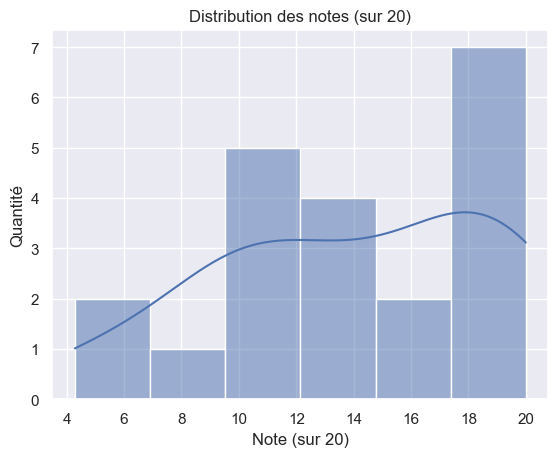

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.histplot(data=grades_df, x="note_dec", kde=True)

plt.title("Distribution des notes (sur 20)")
plt.xlabel("Note (sur 20)")
plt.ylabel("Quantité")

plt.show()


**Exercice 2 - Comparaison des notes en fonction des salles :**
* a) Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant la moyenne des notes des étudiants pour chaque salle.


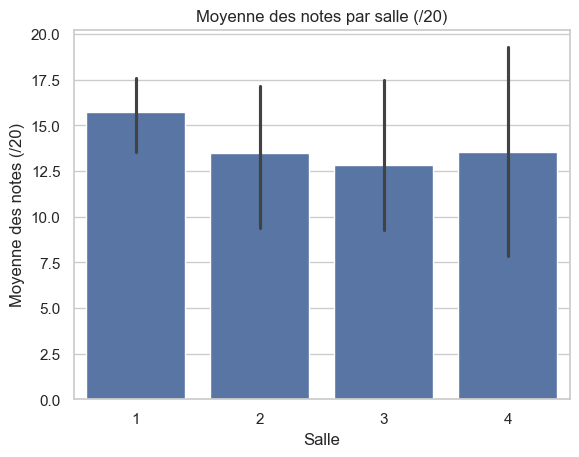

In [ ]:
sns.set(style="whitegrid")

sns.barplot(data=grades_df, x="salle", y="note_dec", estimator="mean") # estimator="mean" calcule la moyenne de note_dec par salle (de y par x)

plt.title("Moyenne des notes par salle (/20)")
plt.xlabel("Salle")
plt.ylabel("Moyenne des notes (/20)")

plt.show()


**Exercice 3 - Comparaison des notes en fonction du statut de réussite :**
* a) Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant le nombre d'étudiants ayant réussi et échoué.


Text(0, 0.5, "Nombred'etudiants")

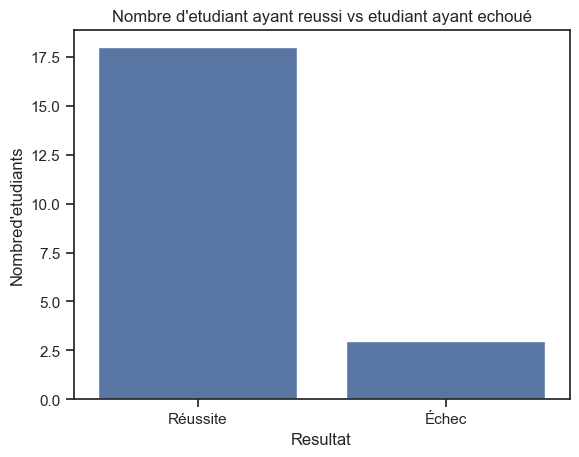

In [30]:
sns.set(style="ticks")

# countplot compte automatiquement les occurences de chaque valeur dans result
sns.countplot(data=grades_df, x = 'result')

plt.title("Nombre d'etudiant ayant reussi vs etudiant ayant echoué")
plt.xlabel("Resultat")
plt.ylabel("Nombred'etudiants")